## INTRODUCTION

Understanding population trends and anticipating demographic change are crucial for national development planning and for implementing the 2030 Agenda for Sustainable Development. In line with the principles outlined in the Programme of Action of the International Conference on Population and Development (ICPD), which was established in Cairo in 1994, the 2030 Agenda emphasises that people are at the centre of sustainable development. Current demographic patterns are a sign of upcoming difficulties in accomplishing the SDGs. For instance, nations with high population expansion must ensure that rising numbers of children and youth have access to quality education and work prospects, as well as to schooling and medical care. A growing number of older people and, in some situations, a declining population size must be anticipated in countries where population growth has slowed or stopped. Responding to projected demographic trends and using that information into policy and planning can help with these and other difficulties.

In this project, we will be looking at the population trends of India,one of the most populous countries in the world, in the 21st century. We will compare the India's population trend and the world's population trend. We will also do a statistical analysis in the form of correlation, time series and regression analysis of the 2 major population indicators- birth rate and death rate with the population growth rate in India. 

Before we proceed, let us import some libraries for data importing, interpreting and analysing.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

## IMPORTING POPULATION DATA

In [2]:
data=pd.read_excel('C:/Users/hp/Desktop/PROJECT/population data.xlsx', sheet_name='population')
data

,Year,Population of India(in millions),Growth rate(India),Birth rate,Death rate,Population of world(in millions),Growth rate(world)
0,2000,1056.58,0.018400,26.635,8.804,6114,0.013200
1,2001,1075.00,0.017434,26.170,8.661,6194,0.013085
2,2002,1093.32,0.017042,25.704,8.518,6273,0.012754
3,2003,1111.52,0.016647,25.238,8.375,6352,0.012594
4,2004,1129.62,0.016284,24.752,8.261,6432,0.012594
5,2005,1147.61,0.015926,24.266,8.147,6512,0.012438
6,2006,1165.49,0.015580,23.779,8.034,6593,0.012439
7,2007,1183.21,0.015204,23.293,7.920,6674,0.012286
8,2008,1200.67,0.014756,22.807,7.806,6757,0.012436
9,2009,1217.73,0.014209,22.158,7.697,6840,0.012284


## TO OBTAIN INFORMATION ABOUT THE DATAFRAME

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              21 non-null     int64  
 1   Population of India(in millions)  21 non-null     float64
 2   Growth rate(India)                21 non-null     float64
 3   Birth rate                        21 non-null     float64
 4   Death rate                        21 non-null     float64
 5   Population of world(in millions)  21 non-null     int64  
 6   Growth rate(world)                21 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.3 KB


## DESCRIPTIVE STATISTICS OF THE DATA

In [4]:
data.describe()

,Year,Population of India(in millions),Growth rate(India),Birth rate,Death rate,Population of world(in millions),Growth rate(world)
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2010.000000,1227.616667,0.013681,21.691238,7.749810,6930.761905,0.012074
std,6.204837,100.708417,0.002690,3.037696,0.530081,515.138710,0.000710
min,2000.000000,1056.580000,0.009938,17.592000,7.237000,6114.000000,0.010411
25%,2005.000000,1147.610000,0.011230,18.944000,7.263000,6512.000000,0.011842
50%,2010.000000,1234.280000,0.013591,21.508000,7.589000,6922.000000,0.012273
75%,2015.000000,1310.150000,0.015926,24.266000,8.147000,7348.000000,0.012439
max,2020.000000,1380.000000,0.018400,26.635000,8.804000,7764.000000,0.013200


## POPULATION OF INDIA VS POPULATION OF THE WORLD IN THE 21ST CENTURY

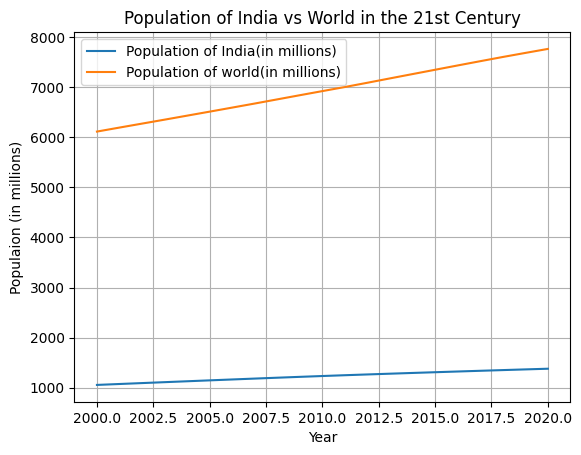

In [5]:
data.plot(y=['Population of India(in millions)','Population of world(in millions)'],x='Year',kind="line")
plt.xlabel('Year')
plt.ylabel('Populaion (in millions)')
plt.title('Population of India vs World in the 21st Century')
plt.legend
plt.grid(True)
plt.show()

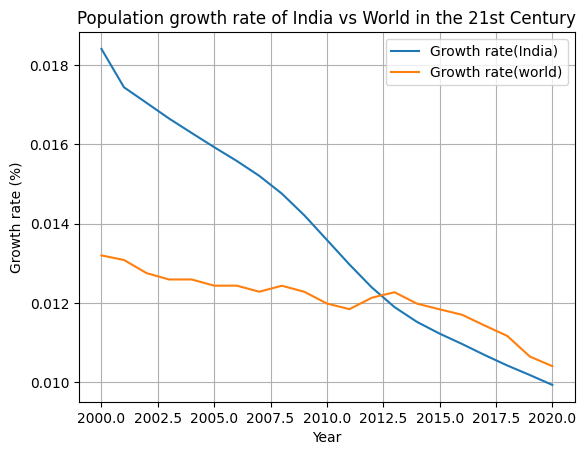

In [6]:
data.plot(y=['Growth rate(India)','Growth rate(world)'],x='Year',kind="line")
plt.xlabel('Year')
plt.ylabel('Growth rate (%)')
plt.title('Population growth rate of India vs World in the 21st Century')
plt.legend
plt.grid(True)
plt.show()


In both the graphs, blue line depicts the population of India and the orange line depicts the population of the world. 

By looking at the line graph, the population of India has gradually increased at a decreasing rate in the 21st century. The world population has also increased at a decreasing rate. While comparing the % of population change of India and the world, we can draw a conclusion that the % of population change of India has always remained high than the % of population change of the world. By comparing the population and population growth rate of India with that of the world we can come to a conclusion that India’s population growth plays a significant role in influencing the world’s population growth. 

## Trend analysis of birth rate and death rate of India during the 21st century

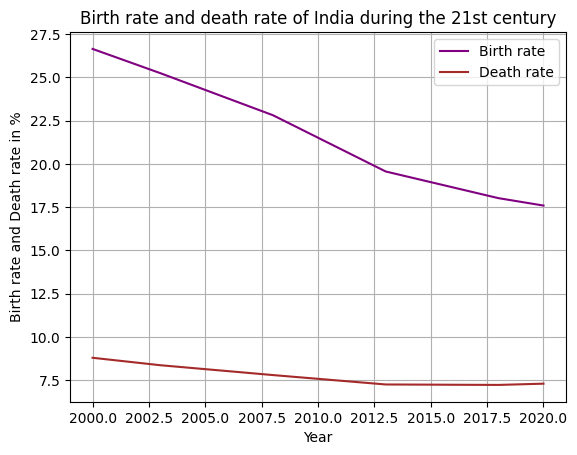

In [7]:
data.plot(y=['Birth rate','Death rate'],x='Year',kind="line", color=['Purple','Brown'])
plt.xlabel('Year')
plt.ylabel('Birth rate and Death rate in %')
plt.title('Birth rate and death rate of India during the 21st century')
plt.legend
plt.grid(True)
plt.show()

Birth rate refers to the number of live births per 1000 people and death rate refers to the number of deaths per 1000 people. From the above time- series graph, we can find out that the birth rate( violet colour line) has actually come down from 26.635% in 2000 to 17.59% in 2020. Thus, we can conclude that the birth rate depicts a downward trend indicating success of government’s policies towards controlling high birth rates in India. 

Even the death rates(brown color line, in graph) in India have witnessed a smooth fall from 8.804% in 2000 to 7.309% in 2020. This again depicts the success of governmental policies towards eradicating infanticide, foeticide, mortality and morbidity. The trend depicts the success of institutional health care system and its accessibility to the people.

## CORRELATION

Correlation between Birth rate and Population growth rate of India


In [8]:
corr1= pearsonr(x=data['Birth rate'],y=data['Growth rate(India)'])
corr1

PearsonRResult(statistic=0.9989292437716711, pvalue=7.886943081895345e-27)

Birth rate and population growth rate are highly positively correlated. As birth rate increases, population growth rate increases. 

Correlation between Death rate and Population growth rate of India

In [9]:
corr2= pearsonr(x=data['Death rate'],y=data['Growth rate(India)'])
corr2

PearsonRResult(statistic=0.9674304139793467, pvalue=8.581958739682229e-13)

Theoritically, death rate and population growth are negatively correlated. As the death rate increases, population growth rate must decrease. However, in this data, we can find a highly positive correlation between the death rate and the population growth rate as India's population growth rate depicts a decreasing trend over the period and death rate also depicts a decreasing trend. 

 ## REGRESSION ANALYSIS

For doing a regression analysis, let us take 2 independent variables- birth rate and death rate, and one dependent variable- population growth rate of India.

REGRESSION PLOT

Regression plot depicting the influence of birth rate on the population growth rate in India

<AxesSubplot: xlabel='Birth rate', ylabel='Growth rate(India)'>

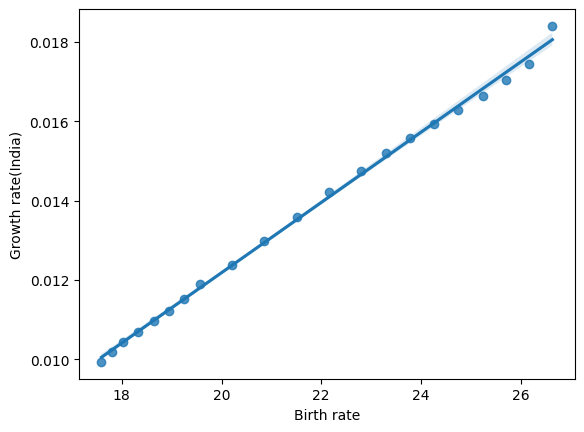

In [10]:
sns.regplot(x=data['Birth rate'],y=data['Growth rate(India)'])

Regression plot depicting the influence of death rate and population growth rate of India

<AxesSubplot: xlabel='Death rate', ylabel='Growth rate(India)'>

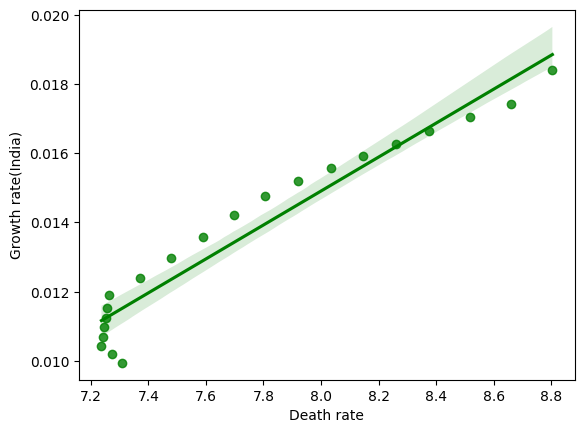

In [11]:
sns.regplot(x=data['Death rate'],y=data['Growth rate(India)'], color='green')

REGRESSION USING ORDINARY LEAST SQAURE METHOD

OLS is a method which is used to compute the regression analysis. 

In this analysis,

x1= birth rate

x2= death rate

y= population growth rate

In [12]:
x1=data['Birth rate']
x2=data['Death rate']
y=data['Growth rate(India)']
reg= ols("y~x1+x2", data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4539.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           4.65e-25
Time:                        11:45:28   Log-Likelihood:                 160.36
No. Observations:                  21   AIC:                            -314.7
Df Residuals:                      18   BIC:                            -311.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0044      0.001     -4.699      0.000      -0.006      -0.002
x1             0.0009   3.92e-05     23.767      0.000       0.001       0.001
x2            -0.0003      0.000     -1.212      0.241      -0.001       0.000
==============================================================================
Omnibus:                       18.964   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.474
Skew:                           1.574   Prob(JB):                     1.78e-06
Kurtosis:                       7.511   Cond. No.                         813.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The OLS Regression result provides various insights on the regression equation, R-squared, adjusted R-squared, F-statisitc, Durbin-Watson test and so on. In this project we will be looking at the regression equation, R-squared and adjusted R-squared. 

The regression equation can be depicted as follows

Y = -0.0044 + 0.0009x1 - 0.0003x2

This can also be written as:

Y = -0.0044 + 0.0009(Birth rate) - 0.0003(Death rate)

The equation represents a linear regression model where the dependent variable Y represents the population growth rate. The independent variables x and z represent the birth rate and death rate, respectively.

Interpretation of the coefficients:

The constant term (-0.0044) represents the expected population growth rate when both the birth rate (x1) and death rate (x2) are zero. In this case, it suggests that even in the absence of births and deaths, there is a small negative population growth rate.

The coefficient of x1 (0.0009) indicates the change in the population growth rate associated with a one-unit increase in the birth rate (assuming the death rate remains constant). In this case, a one-unit increase in the birth rate is associated with an increase of 0.0009 in the population growth rate.

The coefficient of x2 (-0.0003) represents the change in the population growth rate associated with a one-unit increase in the death rate (assuming the birth rate remains constant). Here, a one-unit increase in the death rate is associated with a decrease of 0.0003 in the population growth rate.

Overall, the equation suggests that the population growth rate (Y) is influenced by both the birth rate (x1) and death rate (x2). The coefficients provide information about the direction and magnitude of these influences, allowing for a quantitative analysis of the relationship between population growth and the birth and death rates.

R-squared and Adjusted R-squared:

The R-squared and adjusted R-squared values for the given OLS equation are both 0.998. It suggests that approximately 99.8% of the variability in the population growth rate (Y) can be explained by the linear relationship with the birth rate (x1) and death rate (x2) included in the model.

A high R-squared value indicates a strong fit of the model to the data, suggesting that the independent variables (birth rate and death rate) are effective in explaining the changes in the population growth rate. In this case, the birth rate and death rate variables are accounting for a large portion of the observed variability in the population growth rate.

The adjusted R-squared takes into account the number of variables in the model and adjusts the R-squared value accordingly. It provides a more conservative estimate of the model's explanatory power, penalizing the addition of unnecessary variables. In this case, the adjusted R-squared being close to the R-squared value indicates that the birth rate and death rate variables are likely the most important predictors of the population growth rate.

Overall, with such high R-squared and adjusted R-squared values, it suggests that the given model with birth rate and death rate as predictors provides a very good fit to the data and explains a substantial amount of the variation in the population growth rate.

## CONCLUSION

Numerous conclusions can be drawn from the descritive statistics, secular trend of population of India and the world, correlation and regression analysis between birth rate, death rate, and population growth rate,. In order to manage its population, India is benefiting from the drop-in birth rates. The declining birth rate, backed up with data and statistical analysis, over time shows how people are becoming more concerned about population control. The declining death rate also depict that India is focussing on improvement in health and wellness of people.  Overall, the declining pace of population growth itself is a positive indicator. 

Moreover, India is on the right side of demographic transition that provides golden opportunity for its rapid socio-economic development, if policymakers align the developmental policies with this shift. This demographic transition or shift also brings complex challenges with it. If the increased workforce is not sufficiently skilled, educated and provided gainful employment, India would be facing demographic disaster instead. To reap the benefits of the shift, proper investment in human capital is needed by focussing on education, skill development and healthcare facilities.

